## Lab 10 
### FFT

In [45]:
import numpy as np 
from time import perf_counter
import matplotlib.pyplot as plt

1.1 FFT

In [30]:
def create_F_matrix(n):
    F = np.zeros((n,n), dtype=complex)
    for i in range(n):
        for j in range(n):
            # see http://webhome.phy.duke.edu/~rgb/Class/phy51/phy51/node15.html
            F[i][j] = np.exp(-1j * 2 * np.pi * i * j / n)

    return F

def FFT(x: np.array):
    n = len(x)
    return create_F_matrix(n) @ x

In [26]:
x = list(range(128))

my_fft = FFT(x)
np_fft = np.fft.fft(x)

np.testing.assert_allclose(my_fft, np_fft)

1.2 IDFT

In [39]:
def IDFT(x: np.array):
    n = len(x)
    return create_F_matrix(n).conj().T @ x / n

In [40]:
x = list(range(128))
my_ifft = IDFT(x)
np_ifft = np.fft.ifft(x)
np.testing.assert_allclose(my_ifft, np_ifft)

1.3 Colley-Tukey

In [28]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd,X_even+factor[int(N/2):]*X_odd])
        return X

In [29]:
x = list(range(128))

np_fft = np.fft.fft(x)
my_fft = FFT(x)

np.testing.assert_allclose(my_fft, np_fft)

Wykres

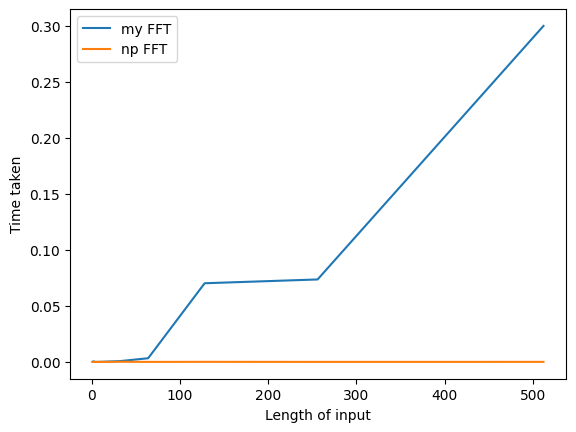

In [49]:
def check_time():
    X = []
    Y_my = []
    Y_np = []
    for i in range(10):
        x = list(range(2**i))
        X.append(len(x))
        start = perf_counter()
        FFT(x)
        end = perf_counter()
        Y_my.append(end-start)
        start = perf_counter()
        np.fft.fft(x)
        end = perf_counter()
        Y_np.append(end-start)
        # print(f"FFT of length {2**i} took {end-start} seconds")
    plt.plot(X, Y_my, label="my FFT")
    plt.plot(X, Y_np, label="np FFT")
    plt.xlabel("Length of input")
    plt.ylabel("Time taken")
    plt.legend()
    plt.show()
    
check_time()
        

Zadanie 2. DFT

P. a)

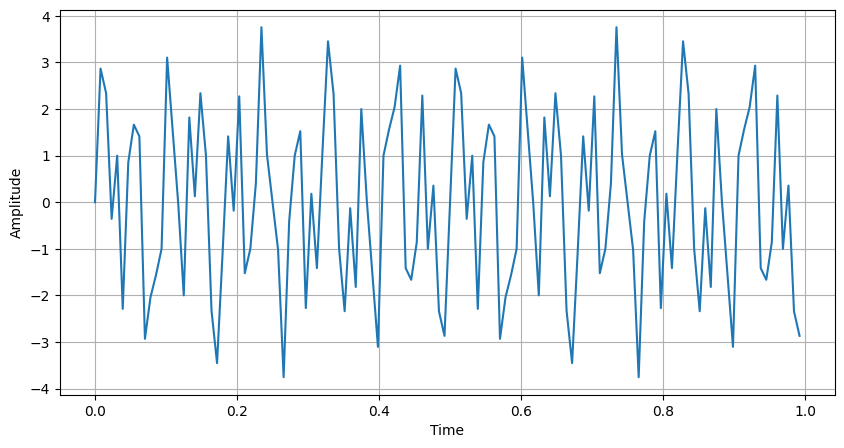

In [96]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 10
x = np.sin(2*np.pi*freq*t)

freq = 40
x += np.sin(2*np.pi*freq*t)

freq = 70  
x += np.sin(2*np.pi*freq*t)

freq = 150

x += np.sin(2*np.pi*freq*t)

freg = 300

x += np.sin(2*np.pi*freq*t)

plt.figure(figsize=(10,5))
plt.plot(t,x, label='Original signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


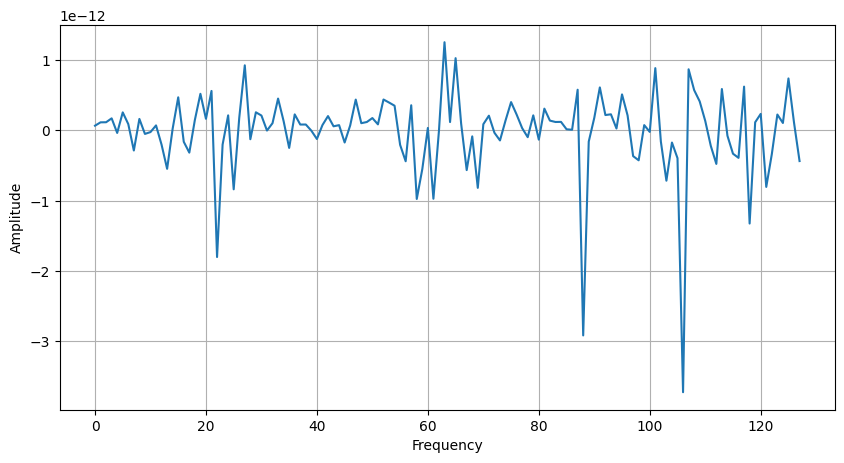

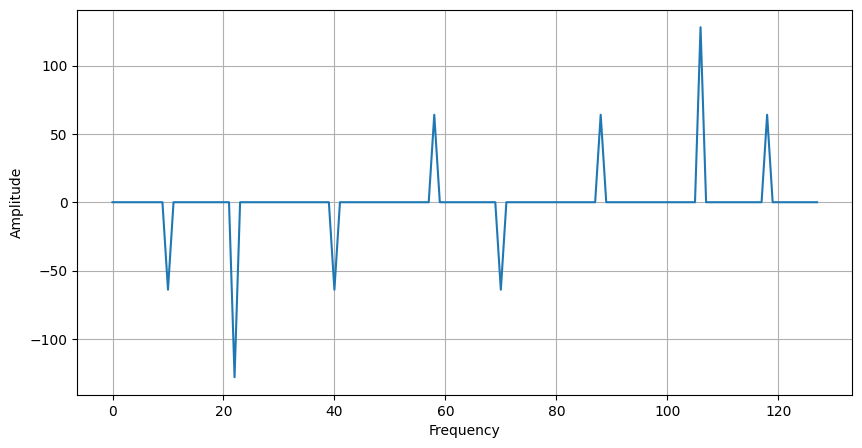

In [97]:
X = FFT(x)
# Draw real part
plt.figure(figsize=(10,5))
plt.plot(np.real(X), label='Real part')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
# Draw imaginary part
plt.figure(figsize=(10,5))
plt.plot(np.imag(X), label='Imaginary part')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Zad 2b)

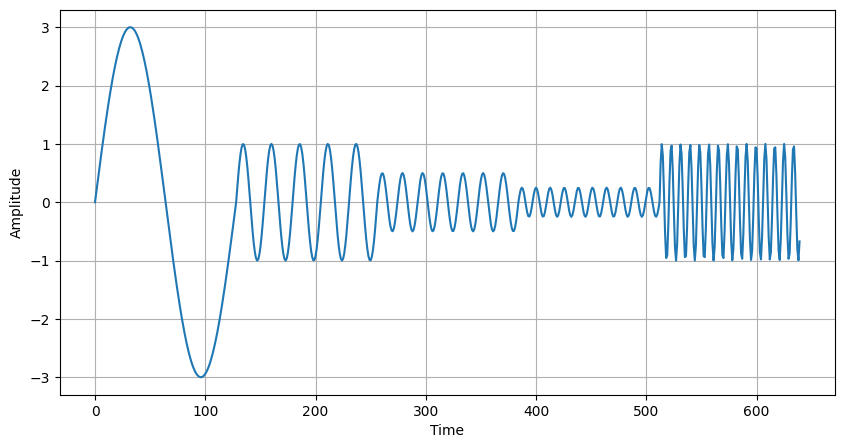

In [100]:
# sampling rate
sr = 128

ts = 1.0/sr
t1 = np.arange(0,1,ts)
t2 = np.arange(0,1,ts)
t3 = np.arange(0,1,ts)
t4 = np.arange(0,1,ts)
t5 = np.arange(0,1,ts)

freq = 1
x1 = 3*np.sin(2*np.pi*freq*t1)

freq = 5

x2 = np.sin(2*np.pi*freq*t2)

freq = 7

x3 = 0.5* np.sin(2*np.pi*freq*t3)

freq = 10

x4 = 0.25* np.sin(2*np.pi*freq*t4)

freq = 15

x5 = np.sin(2*np.pi*freq*t5)

x = np.concatenate([x1,x2,x3,x4,x5])

plt.figure(figsize=(10,5))
plt.plot(x, label='Original signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()




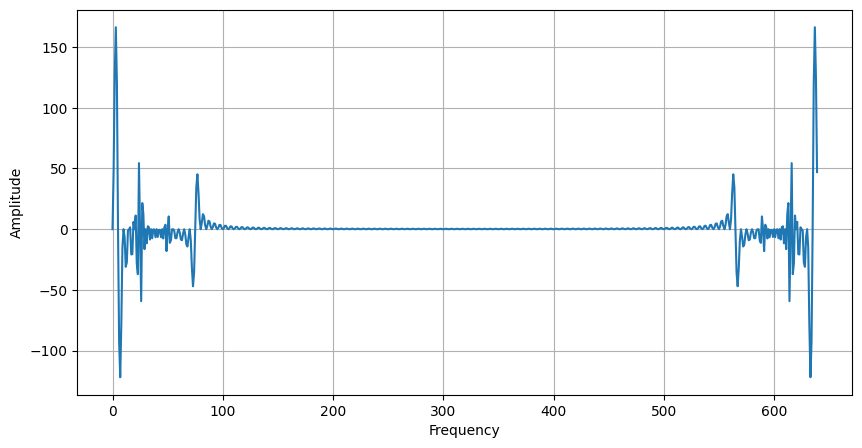

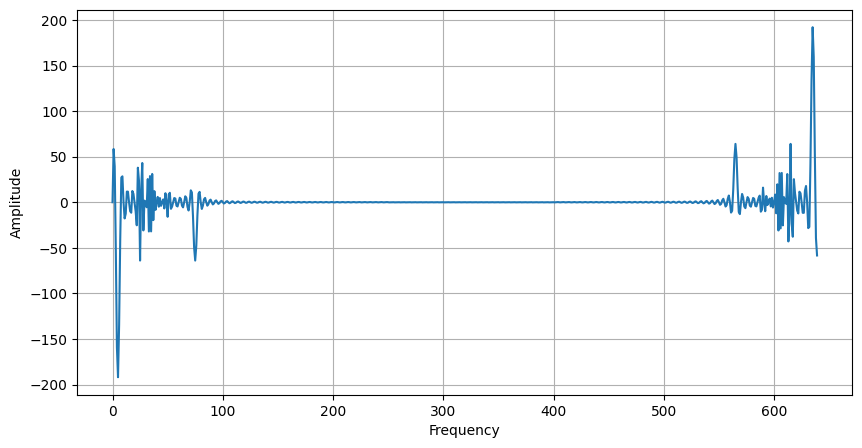

In [101]:
X = FFT(x)
# Draw real part
plt.figure(figsize=(10,5))
plt.plot(np.real(X), label='Real part')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
# Draw imaginary part
plt.figure(figsize=(10,5))
plt.plot(np.imag(X), label='Imaginary part')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()